# __Time Series Modeling:__ _Exploratory Data Analysis_

## ___Notebook 2:___ _Histograms and the Kernel Density Estimator_

_By: Trevor Rowland_ ([@dBCooper2](https://github.com/dBCooper2))

This notebook aims to create python exercises for plotting the Histograms and Kernel Density estimates of Price and Return Data.

## _References_

Ruppert, David and David S. Matteson. _Statistics and Data Analysis for Financial Engineering with R examples_. $2^{nd}$ ed., Springer, 2015.

Mathison, Jake. "Kernel Density Estimation." Kernel Density Estimation, n.d., [mathisonian.github.io/kde/](https://mathisonian.github.io/kde/).

Tommy Odland. [Tommyod/kdepy: Kernel Density Estimation in Python](https://github.com/tommyod/KDEpy/tree/master). v0.9.10, Zenodo, 18 Dec. 2018, doi:10.5281/zenodo.2392268.


## _Table of Contents_

[Data Collection](#data-collection)

__..__ [Define the Returns Functions](#define-the-returns-functions)

__..__ [Collect Net, Log and Root Returns](#collect-net-log-and-root-returns-for-the-dataframe)

[Histograms](#histograms)

__..__ [Creating the Histogram](#creating-the-histogram)

__..__ [Checking Distribution as Bin Size Increases](#checking-the-distribution-as-bin-size-increases)

__....__ [Adjusted Close](#adjusted-close)

__....__ [Net Return](#net-returns)

__....__ [Log Return](#log-returns)

__....__ [Root Return](#root-returns)

[The Kernel Density Estimator](#the-kernel-density-estimator)

__..__ [Plotting the Gaussian Kernel Function](#plotting-the-gaussian-kernel-function)

__....__ [Gaussian KDE Plot](#kde-plot)

__....__ [Histogram vs KDE for Adjusted Close Prices](#histogram-vs-kde-for-adjusted-close-price)

[The Transformed Kernel Density Estimator](#the-transformed-kernel-density-estimator)

__..__ [Graphing the TKDE Side-by-Side](#graphing-the-distributions-side-by-side)

__..__ [Graphing TKDEs: Net vs Log vs Root Return](#graphing-net-log-and-root-returns-against-each-other)

[Conclusion: Comparing Histograms and with their KDE Equivalents](#conclusion-graphing-histograms-with-their-kde-equivalents)

## Data Collection

The data for the next chapters in Python will be pulled from the Semiconductor Industry CSVs used in the Returns notebook.

The company used will be APH. The data accessed will be daily candle data from 2019 to 2024.

_(ARM was skipped over because its data only reaches back to 2023)_

In [42]:
# Import Libraries
import pandas as pd
import numpy as np
import pygwalker as pyg

In [43]:
aph_daily_fn = '/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/APH/APH_Candles_Daily.CSV'
aph_d_df = pd.read_csv(aph_daily_fn)

aph_d_df.set_index(aph_d_df['Date'], inplace=True)
aph_d_df = aph_d_df.drop(columns='Date')

aph_d_df = aph_d_df.filter(items=['Date', 'Adj Close'])
aph_d_df = aph_d_df.rename(columns={'Adj Close':'Adj_Close'})

aph_d_df.head()

,Adj_Close
Date,
2019-01-25,41.033318
2019-01-28,40.771805
2019-01-29,40.923958
2019-01-30,41.941471
2019-01-31,41.803589


### _Define the Returns Functions_

_From returns_notes.ipynb_ [ADD LINK LATER]

In [44]:
# Net Return and Log Return Functions:
def get_net_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Net_Return']= df[col_name].pct_change(periods=num_periods)
    return df

def get_log_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Log_Return'] = np.log(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

# New one for Transformations: Root Returns
def get_root_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Root_Return'] = np.sqrt(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

### _Collect Net, Log, and Root Returns for the DataFrame_ 

In [45]:
aph_df = get_net_returns(aph_d_df, 'Adj_Close', 1)
aph_df = get_log_returns(aph_df, 'Adj_Close', 1)
aph_df = get_root_returns(aph_df, 'Adj_Close', 1)

aph_df.head()

,Adj_Close,Net_Return,Log_Return,Root_Return
Date,,,,
2019-01-25,41.033318,NaN,NaN,NaN
2019-01-28,40.771805,-0.006373,-0.006394,0.996808
2019-01-29,40.923958,0.003732,0.003725,1.001864
2019-01-30,41.941471,0.024864,0.024559,1.012355
2019-01-31,41.803589,-0.003287,-0.003293,0.998355


## Histograms

The Histogram is a good first estimator to see what the distributions of the data look like, and are a good starting point before diving into more complicated estimators like the KDE and CDF.

In [112]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

### _Creating the Histogram_

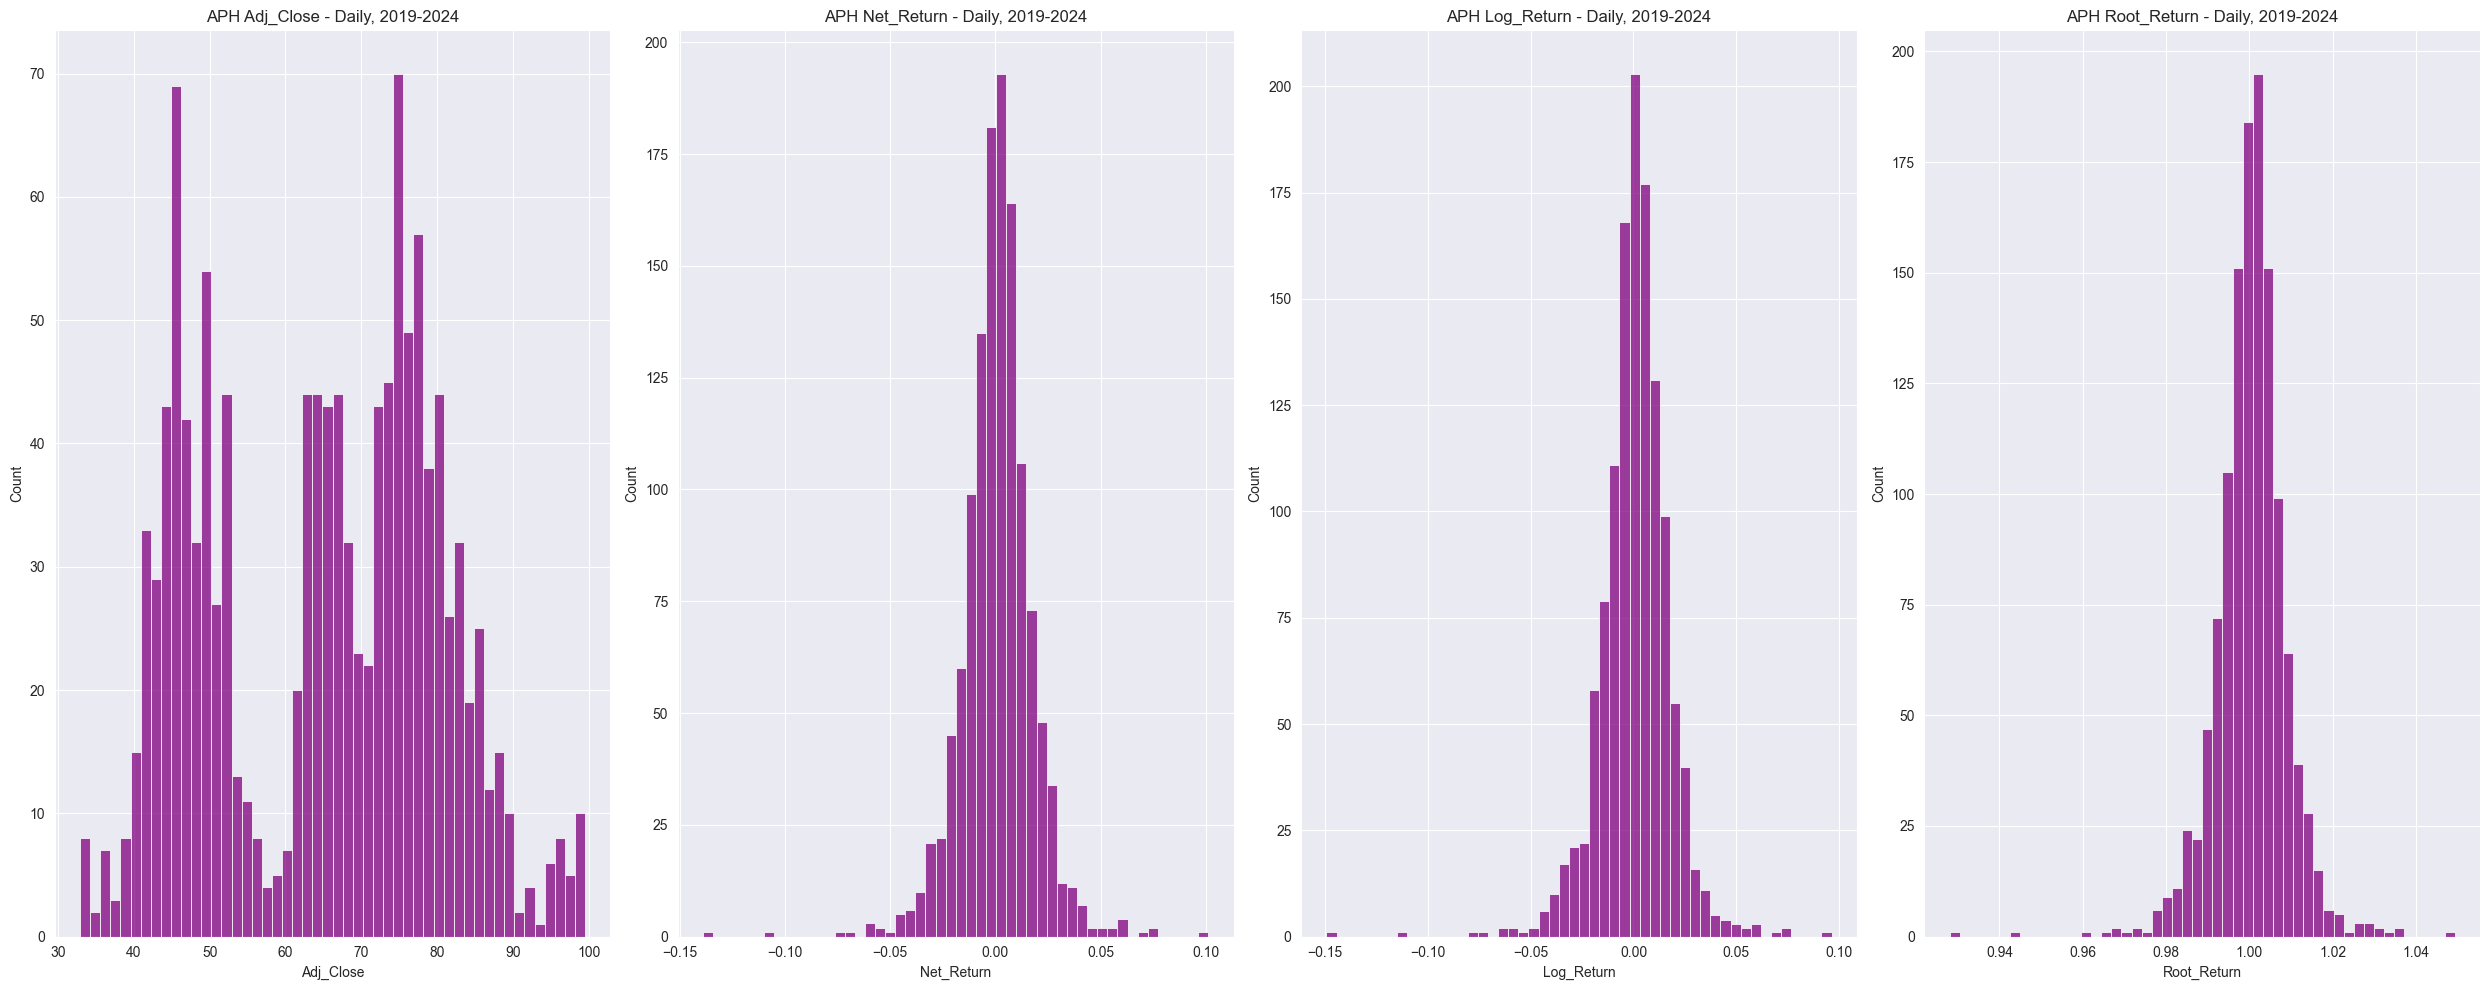

In [47]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(25, 10))

# Loop through the subplots and add the histograms
i=0
cols = aph_df.columns.to_list()
while i<len(cols):
    sns.histplot(data=aph_df[cols[i]].dropna(), ax=axs[i], bins=50, color='purple')
    axs[i].set_title(f'APH {cols[i]} - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Here are the probability distributions for APH. The graphs are in order from left to right and plot the Daily Adjusted Closing Price, Net Returns, Log Returns, and Root Returns of the stock.

The Adjusted Closing Prices seem to follow a multi-modal distribution, while all of the transformed returns look like they follow a Normal Distribution.

### _Checking the Distribution as Bin Size Increases:_

The shape of the distribution can be examined by plotting a series of histograms from a small number of bins to a large number of bins to see if a distribution starts to take shape.

#### __Adjusted Close__

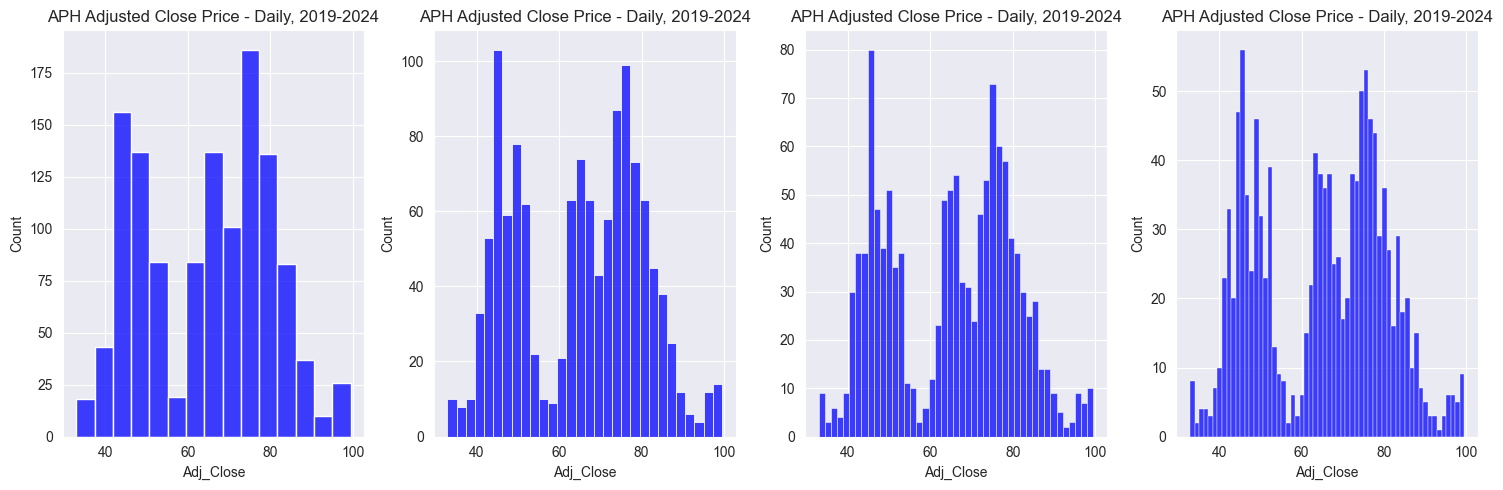

In [48]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Adj_Close'].dropna(), ax=axs[i-1], bins=15*i, color='blue')
    axs[i-1].set_title(f'APH Adjusted Close Price - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### __Net Returns__

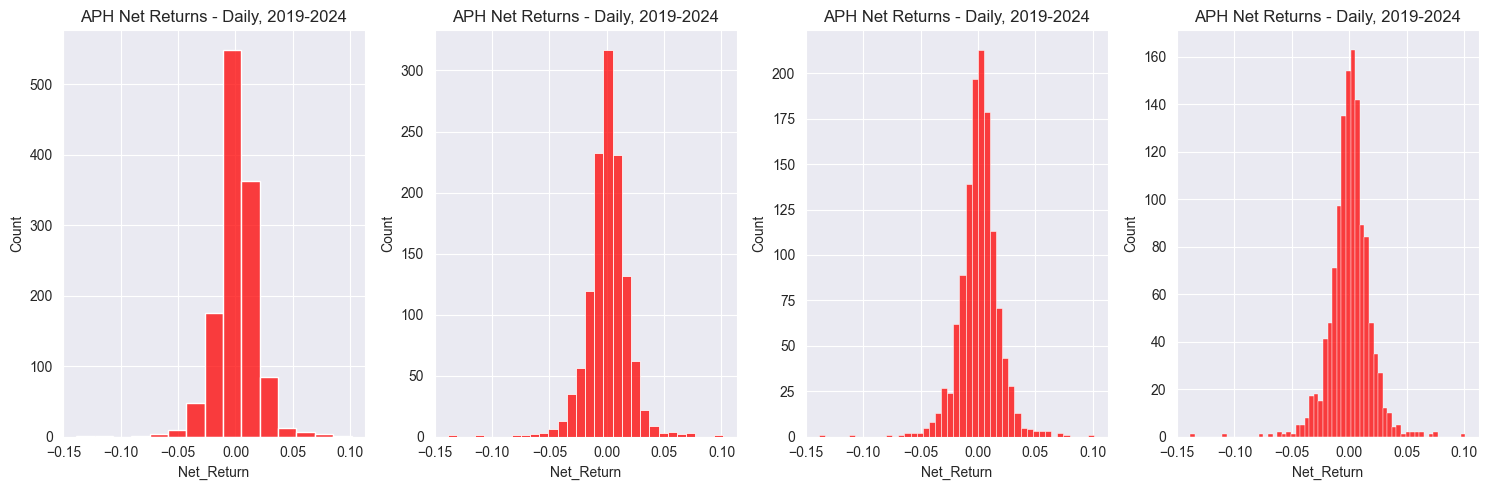

In [49]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Net_Return'].dropna(), ax=axs[i-1], bins=15*i, color='red')
    axs[i-1].set_title(f'APH Net Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### __Log Returns__

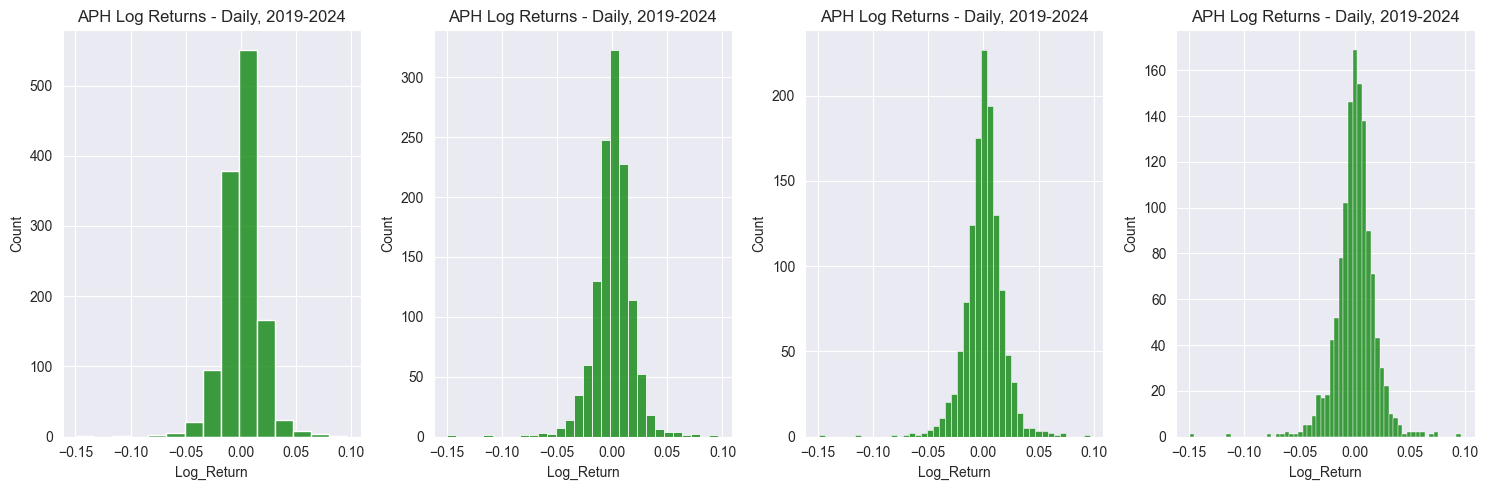

In [50]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Log_Return'].dropna(), ax=axs[i-1], bins=15*i, color='green')
    axs[i-1].set_title(f'APH Log Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### __Root Returns__

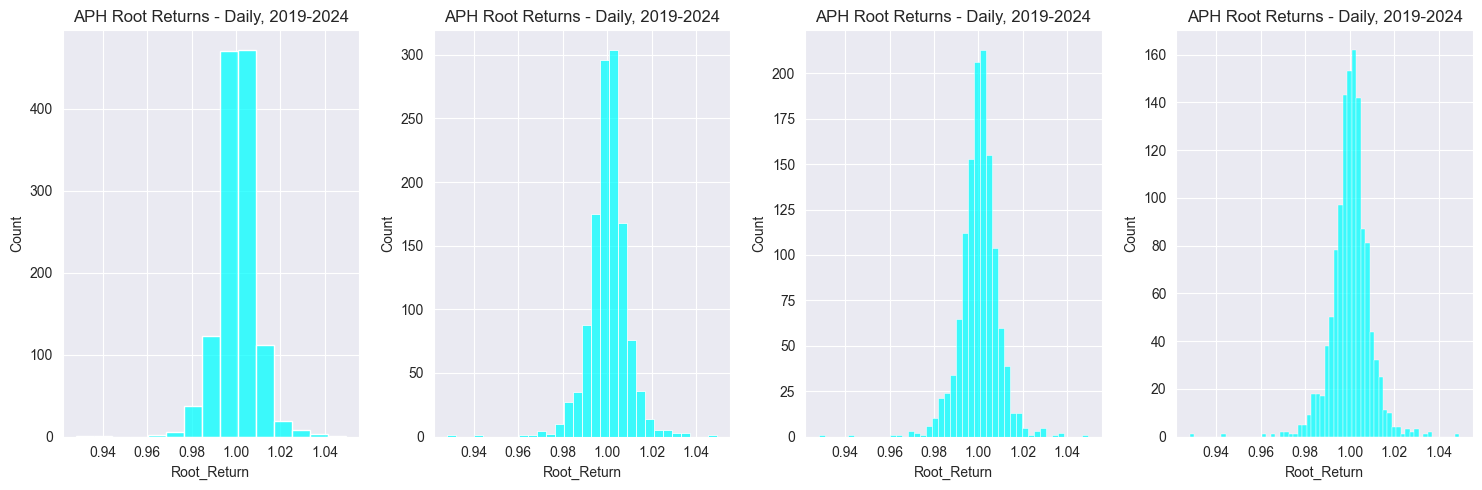

In [51]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop through the subplots and add the histograms
i=1
cols = aph_df.columns.to_list()
while i<5:
    sns.histplot(data=aph_df['Root_Return'].dropna(), ax=axs[i-1], bins=15*i, color='cyan')
    axs[i-1].set_title(f'APH Root Returns - Daily, 2019-2024')
    i+=1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

For each of the distributions, as the bin size increases, the distribution's shape becomes clearer. The returns all seem to have a normal distribution, while the raw price data appears to have a multimodal distribution.

## The Kernel Density Estimator

Recall from the textbook notes that the Kernel Density Estimator function is defined as:

The Kernel Density Estimator, or KDE, based on the random events from the time series $Y_1, ..., Y_n$ is:

$$\hat{f}(y) = \frac{1}{nb}\sum_{i=1}^{n}K(\frac{y-Y_i}{b})$$

Where:

$K$ is the probability density function(and is symmetric about 0)

$b$ is the _bandwidth_, and determines the resolution of the estimator

$y$ is the input of the probability distribution function

$Y_i$ is the random event

and $n$ is the number of random events

As explained in Matthew Conlen's neat [visualization of the KDE](https://mathisonian.github.io/kde/), the KDE is a powerful tool used to create smooth curves given a set of data, and better understand what the distribution of the dataset is.

The [Adjusted Closing Price](#adjusted-close) data graphed in the histograms are sampled from the stock APH, which currently has an unknown distribution. 

The KDE is a way to approximate the distribution underlying that sample, with the bandwidth($b$) affecting how smooth the distribution curve is.

The KDE approximates this curve by using the probability density function, $K$, to weight all of the distances away from each point of the line. If there are more observations nearby, the estimate will be higher, and vice versa.

The way the KDE weights these distances depends on the bandwidth. The bandwidth is the deciding factor of how "far away" the function is looking when it weights the distances. The larger the bandwidth, the further the $K$ will look.

After looking at the [KDEPy](https://github.com/tommyod/KDEpy/tree/master) Project, building my own KDE Model is far beyond the scope of this project, and this notebook is just focused on understanding the concept.

In [113]:
# Imports, Setting Styles...
import seaborn as sns
import matplotlib.pyplot as plt
from KDEpy import FFTKDE

sns.set_style('darkgrid')

# This is the DF to operate on
aph_df.head()

,Adj_Close,Net_Return,Log_Return,Root_Return
Date,,,,
2019-01-25,41.033318,NaN,NaN,NaN
2019-01-28,40.771805,-0.006373,-0.006394,0.996808
2019-01-29,40.923958,0.003732,0.003725,1.001864
2019-01-30,41.941471,0.024864,0.024559,1.012355
2019-01-31,41.803589,-0.003287,-0.003293,0.998355


### _Plotting the Gaussian Kernel Function_

KDEPy offers the following Kernel Functions $K$: gaussian, exponential, box, tri, epa, biweight, triweight, tricube, and cosine.

This notebook will use the gaussian kernel to visualize the data.

#### __KDE Plot__

Text(0.5, 1.0, 'Daily Adjusted Closing Price for APH, 2019-2024')

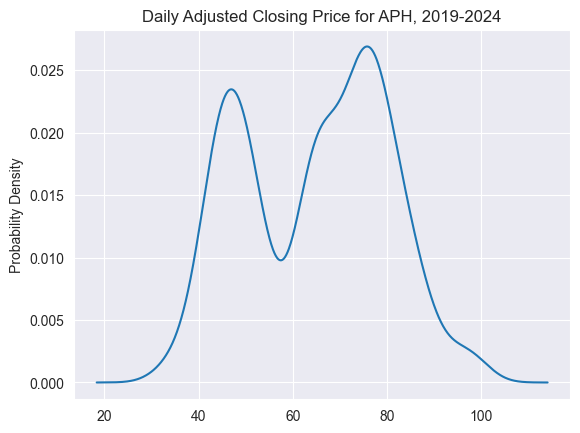

In [53]:
aph_adj_price = aph_df['Adj_Close'].to_list()

# From the KDEPy tutorial on their github
x,y = FFTKDE(kernel='gaussian', bw='silverman').fit(aph_adj_price).evaluate()
plt.plot(x,y)

plt.ylabel('Probability Density')
plt.title('Daily Adjusted Closing Price for APH, 2019-2024')

#### __Histogram vs KDE for Adjusted Close Price:__

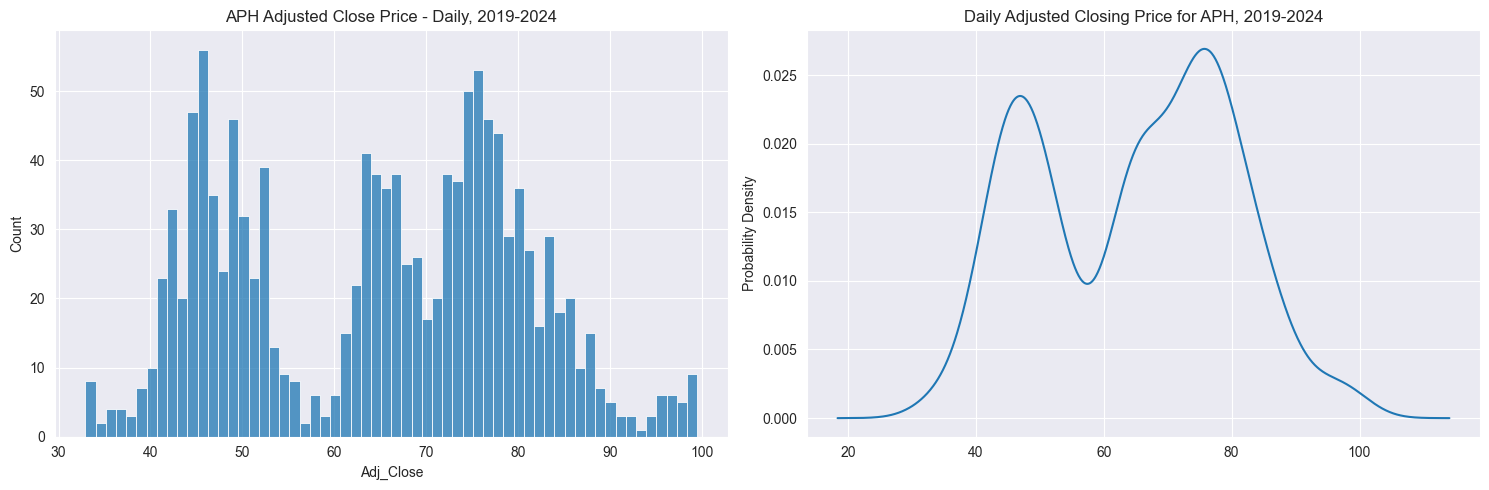

In [54]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=aph_df['Adj_Close'], ax=axs[0], bins=60)
axs[0].set_title(f'APH Adjusted Close Price - Daily, 2019-2024')

x,y = FFTKDE(kernel='gaussian', bw='silverman').fit(aph_adj_price).evaluate()
plt.plot(x,y)

plt.ylabel('Probability Density')
plt.title('Daily Adjusted Closing Price for APH, 2019-2024')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Here the histogram's distribution is very similar in shape to the probability density plotted by the kernel density estimator. This is an irregular distribution that will be difficult to perform statistical analysis on, but the returns should look like a normal distribution when they are plotted with the KDE.

## The Transformed Kernel Density Estimator

The transformed KDE, or TKDE, takes transformed data and passes it through the kernel density estimator. Taking the transformed Net, Log and Root Returns should provide a better estimate using the gaussian KDE's.

#### __Graphing the Distributions Side-by-Side__

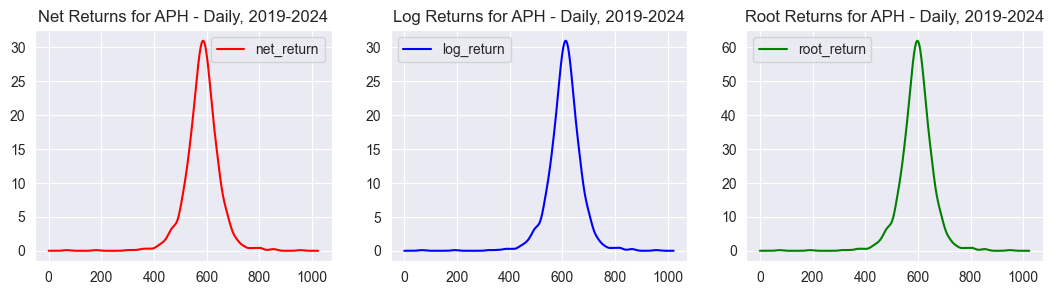

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13,3));

axs[0].set_title('Net Returns for APH - Daily, 2019-2024')
axs[1].set_title('Log Returns for APH - Daily, 2019-2024')
axs[2].set_title('Root Returns for APH - Daily, 2019-2024')

df[['net_return']].plot(ax=axs[0], color='red');
df[['log_return']].plot(ax=axs[1], color='blue');
df[['root_return']].plot(ax=axs[2], color='green');

Each of the KDE's appears to follow a normal distribution here. Now they should be graphed against each other to visualize the differences between them.

#### __Graphing Net, Log and Root Returns Against each Other__

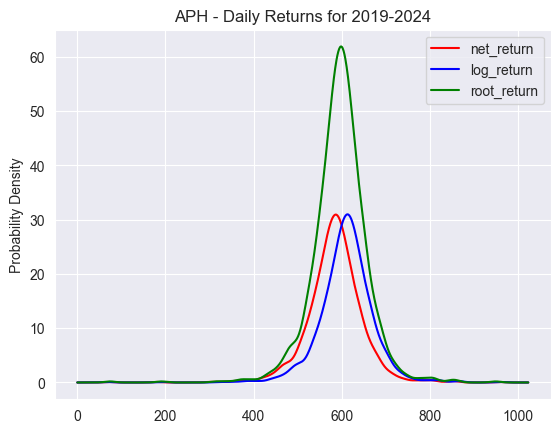

<Figure size 500x500 with 0 Axes>

In [111]:
df = pd.DataFrame()

df['nr_x'], df['net_return'] = FFTKDE(kernel='gaussian', bw='silverman').fit(aph_df['Net_Return'].dropna().to_list()).evaluate()
df['lr_x'], df['log_return'] = FFTKDE(kernel='gaussian', bw='silverman').fit(aph_df['Log_Return'].dropna().to_list()).evaluate()
df['rr_x'], df['root_return'] = FFTKDE(kernel='gaussian', bw='silverman').fit(aph_df['Root_Return'].dropna().to_list()).evaluate()

df[['net_return','log_return','root_return']].plot(color=['red','blue','green'])
plt.title('APH - Daily Returns for 2019-2024')
plt.ylabel('Probability Density')

plt.figure(figsize=(5,5))

plt.show()

Now with the KDE's of each return type graphed against each other, the assumptions about each return type can be better visualized.

The net returns and log returns have different estimates but are essentially the same distribution, just like the definition of log returns established in the [returns notebook](link to returns, why log returns?)

The root returns have the highest probability density, meaning they take the raw price data and centralize it with a very high density at the center of the distribution, which appears to be 600.

Now the KDE's will be compared alongside the original histograms to show their similarities.

## _Conclusion: Graphing Histograms with their KDE Equivalents_

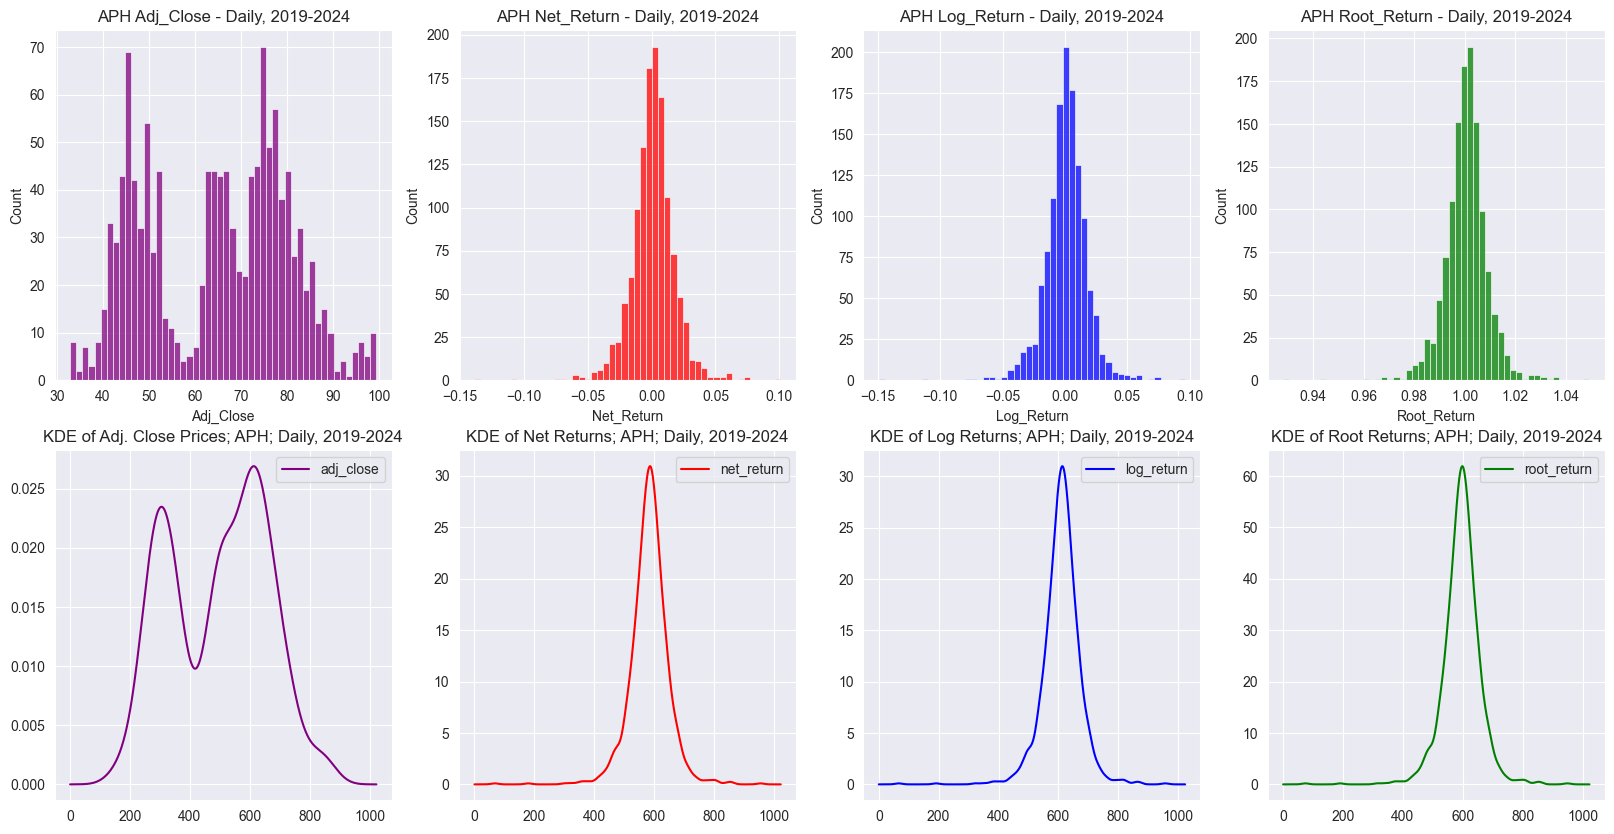

In [109]:
# Setting up the Image:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10));

axs[0][0].set_title('Adj. Close Prices; APH; Daily, 2019-2024')
axs[0][1].set_title('Net Returns; APH; Daily, 2019-2024')
axs[0][2].set_title('Log Returns; APH; Daily, 2019-2024')
axs[0][3].set_title('Root Returns; APH; Daily, 2019-2024')

axs[1][0].set_title('KDE of Adj. Close Prices; APH; Daily, 2019-2024')
axs[1][1].set_title('KDE of Net Returns; APH; Daily, 2019-2024')
axs[1][2].set_title('KDE of Log Returns; APH; Daily, 2019-2024')
axs[1][3].set_title('KDE of Root Returns; APH; Daily, 2019-2024')

# Plotting the Histograms
i=0
cols = aph_df.columns.to_list()
while i<len(cols):
    if cols[i] == 'Adj_Close':
        color = 'purple'
    elif cols[i] == 'Net_Return':
        color = 'red'
    elif cols[i] == 'Log_Return':
        color = 'blue'
    elif cols[i] == 'Root_Return':
        color = 'green'
    else:
        color = 'black'
    
    sns.histplot(data=aph_df[cols[i]].dropna(), ax=axs[0][i], bins=50, color=color)
    axs[0][i].set_title(f'APH {cols[i]} - Daily, 2019-2024')
    i+=1

# Calculating KDE of Adj Close
df['ac_x'], df['adj_close'] = FFTKDE(kernel='gaussian', bw='silverman').fit(aph_df['Adj_Close'].dropna().to_list()).evaluate()

# Graphing the KDEs
df[['adj_close']].plot(ax=axs[1][0], color='purple');
df[['net_return']].plot(ax=axs[1][1], color='red');
df[['log_return']].plot(ax=axs[1][2], color='blue');
df[['root_return']].plot(ax=axs[1][3], color='green');


In conclusion, these graphs show the power of transforming price data into returns for statistical analysis. Each of the return transformations has a KDE that resembles a normal distribution, while the raw prices have a distribution and KDE estimate that contains significantly more variation.

These graphs and estimates are great, but do not fully capture the distribution of each sample. In the next notebook, more rigorous tests of normality will be run.